In [2]:
import pandas as pd
import pyasn
import matplotlib.pyplot as plt

In [3]:
INPUT_FILE = "./curl-http3-10k.csv"
IPASN_DB_FILE = "./ipasn_20241111"
OUTPUT_FILE = "./asn-http3-10k.csv"

In [4]:
df_input = pd.read_csv(INPUT_FILE)
asndb = pyasn.pyasn(IPASN_DB_FILE)

In [7]:
def get_asn(ip):
    asn = asndb.lookup(ip) or (None, None)
    return asn

In [22]:
asn_data = []
for row in df_input.itertuples():
    ip = row.remote_ip
    asn, _ = get_asn(ip)

    if asn is not None:
        asn_data.append({"ip": ip, "asn": asn})
    else:
        print(f"ASN lookup failed for IP: {ip}")

df_asn = pd.DataFrame(asn_data)
df_asn

,ip,asn
0,142.250.181.196,15169
1,88.221.169.152,16625
2,157.240.0.35,32934
3,72.21.210.29,16509
4,2.16.252.237,16625
...,...,...
988,190.115.31.47,59692
989,151.101.2.137,54113
990,172.64.151.96,13335
991,88.221.221.49,20940


In [23]:
df_counts = df_asn["asn"].value_counts()
df_counts

asn
16509    177
13335    161
16625    101
54113     89
20940     52
        ... 
217        1
25159      1
43391      1
19318      1
8839       1
Name: count, Length: 185, dtype: int64

16509 - Amazon.com, Inc.

13335 - Cloudflare, Inc.

16625 - Akamai Technologies, Inc.

54113 - Fastly, Inc.

20940 - Akamai International B.V

15169 - Google LLC

8075 - Microsoft Corporation

209242 - Cloudflare London, LLC

396982 - Google LLC

14618 - Amazon.com, Inc.

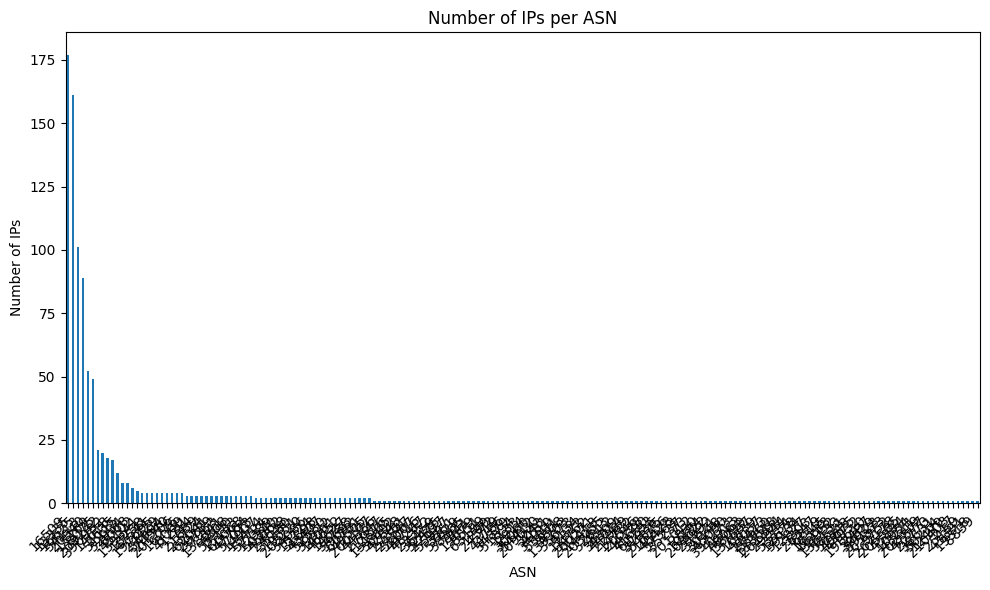

In [24]:
plt.figure(figsize=(10, 6))
df_counts.plot(kind='bar')

plt.title("Number of IPs per ASN")
plt.xlabel("ASN")
plt.ylabel("Number of IPs")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()